### Model the DC field of a dipole array above the sea floor

Here's a sketch:
![sketch](GE_DC_Sketch_B.png)

In [47]:
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert

In [55]:
# A few definitions
waterDepth = 40
ltx = 3.6 # length of transmitter dipole
lrx = 3.36 # length of receiver dipole
htx = 0.3
htx2 = 10.0
dztxrx = 0.8 # fixed distance
resWater = 0.2838 # North Sea water resistivity
current = 10.0 # current in A

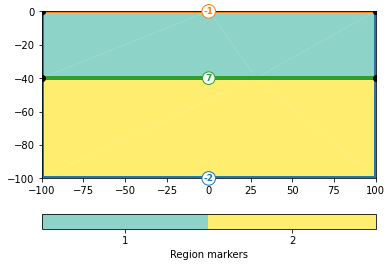

In [56]:
# make a world with two layers, the first being 40m thick
world = mt.createWorld(start=[-100, -100], end=[100, 0], layers=[-waterDepth])
pg.show(world, markers=True);

In [57]:
# create the ERT data (cental to origin)
shm = pg.DataContainerERT()
shm.createSensor([-ltx/2, -waterDepth+htx])
shm.createSensor([+ltx/2, -waterDepth+htx])
shm.createSensor([-lrx/2, -waterDepth+htx+dztxrx])
shm.createSensor([+lrx/2, -waterDepth+htx+dztxrx])
shm.createFourPointData(0, 0, 1, 2, 3)
shm["k"] = ert.geometricFactors(shm, dim=2)
print(shm, shm["k"])

Data: Sensors: 4 data: 1, nonzero entries: ['a', 'b', 'k', 'm', 'n', 'valid'] 1 [6.571467339254143]


In [51]:
for el in shm.sensors():
    world.createNode(el, marker=-99)
    world.createNode(el+[0, 0.03])

Mesh: Nodes: 697 Cells: 1357 Boundaries: 2053


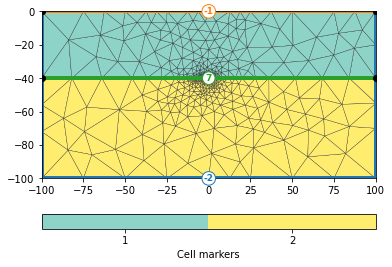

In [52]:
mesh = mt.createMesh(world, quality=34.3)
print(mesh)
pg.show(mesh, markers=True, showMesh=True);

In [54]:
for resSubsurface in [1, 2, 3, 4]:
    resMap = [[1, resWater], [2, resSubsurface]]
    data = ert.simulate(mesh=mesh, scheme=shm, res=resMap)
    voltage = data["rhoa"] / data["k"] * current
    print(resSubsurface, data["rhoa"][0], voltage[0])

1 0.3574770135032109 0.5439835504741082
2 0.38305276975917213 0.5829029499561484
3 0.39305193482892226 0.5981189809482236
4 0.39838281493224886 0.6062311419438098


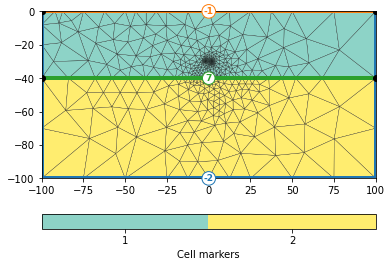

In [63]:
# Now we do the same for higher floor distance
shm = pg.DataContainerERT()
shm.createSensor([-ltx/2, -waterDepth+htx2])
shm.createSensor([+ltx/2, -waterDepth+htx2])
shm.createSensor([-lrx/2, -waterDepth+htx2+dztxrx])
shm.createSensor([+lrx/2, -waterDepth+htx2+dztxrx])
shm.createFourPointData(0, 0, 1, 2, 3)
shm["k"] = ert.geometricFactors(shm, dim=2)
world = mt.createWorld(start=[-100, -100], end=[100, 0], layers=[-waterDepth])
for el in shm.sensors():
    world.createNode(el, marker=-99)
    world.createNode(el+[0, 0.03])

mesh = mt.createMesh(world, quality=34.3)
pg.show(mesh, markers=True, showMesh=True); # refined differently

In [65]:
resSubsurface = 1.0  # calibration in water
resMap = [[1, resWater], [2, resSubsurface]]
data2 = ert.simulate(mesh=mesh, scheme=shm, res=resMap)
voltage = data2["rhoa"] / data2["k"] * current
print(resSubsurface, data2["rhoa"][0], voltage[0])

1.0 0.28389769814047433 0.4320232054999995
